**Homework 4**

**Lê Đỗ Thành Đạt**

# I. Lý thuyết

Đây là bảng confusion matrix của một mô hình phân loại nhị phân

![](https://imgur.com/1UZL68u.png)

Hãy cho biết:

1.- Đâu là công thức đúng của _Sensitivity (độ nhạy)_ ?

A. TP/(TP + FP)

B. TP/(TP + FN)

C. TP/(TN + FN)

D. TP/(TN + FP)

Trả lời: B

2.- Ý nghĩa của _Sensitivity (độ nhạy)_ trong mô hình chuẩn đoán bệnh?

A. Sensitivity cho biết nếu một người mắc bệnh thật thì mô hình có thể nhận biết được mắc bệnh với xác suất là bao nhiêu phần trăm ?

B. Sensitivity cho biết nếu mô hình chuẩn đoán một người mắc bệnh thì người đó có khả năng bị mắc bệnh thật là bao nhiêu phần trăm ?

C. Sensitivity cho biết nếu một người không bị mắc bệnh thì mô hình có thể nhận biết được người đó không mắc bệnh với xác suất bao nhiêu phần trăm ?

D. Sensitivity cho biết trong số những trường hợp không bị mắc bệnh thì mô hình có thể nhận biết được là bao nhiêu phần trăm ?

Trả lời: A

Có ba mô hình với cùng accuracy như sau. 

![](https://imgur.com/zXUy6zd.png)

![](https://imgur.com/0GBEf8v.png)

![](https://imgur.com/t5I6f4y.png)

3.- Mô hình nào sẽ được lựa chọn?

A. Mô hình 1

B. Mô hình 2

C. Mô hình 3

D. Cả ba mô hình đều như nhau.

Trả lời: C. Mô hình 3

4.- f1-score của cả ba mô hình là lần lượt là:

A. m1: 0.571; m2: 0.675; m3: 0.75

B. m1: 0.75; m2: 0.675; m3: 0.889

C. m1: 0.571; m2: 0.75; m3: 0.889

D. không có đáp án nào đúng.

Trả lời: C

5.- Một mô hình phân loại ngẫu nhiên sẽ có đường ROC như thế nào ?

A. Lồi lên phía trên.

B. Tiệm cận đường chéo nét đứt.

C. Lõm xuống phía dưới.

D. Có dạng hình sin.

Trả lời: B

# II. Thực hành

Một mô hình phân loại nhị phân có giá trị dự báo `y_hat` và giá trị ground truth `y` lần lượt như sau:

In [ ]:
import numpy as np

y     = np.array([1, 0, 1, 1, 0,
                  1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

6. Nếu ngưỡng phân loại `threshold = 0.5`. Viết hàm tính 3 giá trị: `precision, recall, f1-score`


In [ ]:
# Ham transform y_hat to mang chi chua 0,1
def transform(y_hat, threshold):
  y_pred = []
  for item in y_hat:
    if item > threshold:
      y_new = 1
      y_pred.append(y_new)
    else:
      y_new = 0
      y_pred.append(y_new)
  return y_pred

In [ ]:
transform(y_hat, 0.5)

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [ ]:
# Ham tinh TP, TN, FP, FN cua confusion matrix
def confusion_matrix(y_hat, y, threshold):
  y_pred = transform(y_hat, threshold)
  confusion_matrix = {
      "TP": 0,
      "TN": 0,
      "FP": 0,
      "FN": 0
  }
  for id in range(len(y)):
    if (y[id] == 1) & (y_pred[id] == 1):
      confusion_matrix["TP"] += 1
    elif (y[id] == 0) & (y_pred[id] == 0):
      confusion_matrix["TN"] += 1
    elif (y[id] == 0) & (y_pred[id] == 1):
      confusion_matrix["FP"] += 1
    else:
      confusion_matrix["FN"] += 1
  return confusion_matrix

In [ ]:
confusion_matrix(y_hat, y, 0.5)

{'TP': 4, 'TN': 5, 'FP': 0, 'FN': 1}

In [ ]:
# Ham tinh precision
def precision(y_hat, y, threshold):
  conf_matrix = confusion_matrix(y_hat, y, threshold)
  if conf_matrix["TP"] == 0:
    precision = 0
  else:
    precision = conf_matrix["TP"]/(conf_matrix["TP"] + conf_matrix["FP"])
  return precision

# Ham tinh recall
def recall(y_hat, y, threshold):
  conf_matrix = confusion_matrix(y_hat, y, threshold)
  if conf_matrix["TP"] == 0:
    recall = 0
  else:
    recall = conf_matrix["TP"]/(conf_matrix["TP"] + conf_matrix["FN"])
  return recall

# Ham tinh f1-score
def f1_score(y_hat, y, threshold):
  prec = precision(y_hat, y, threshold)
  rec = recall(y_hat, y, threshold)
  f1_score = 2/(1/prec + 1/rec)
  return f1_score

In [ ]:
# Tinh toan precision
precision(y_hat, y, threshold = 0.5)

1.0

In [ ]:
# Tinh toan recall
recall(y_hat, y, threshold = 0.5)

0.8

In [ ]:
# Tinh toan f1-score
f1_score(y_hat, y, threshold = 0.5)

0.8888888888888888

7. Nếu ngưỡng phân loại là `threshold = 0.5`. Viết hàm tính giá trị: `sensitivity, specificity`.

In [ ]:
# Ham tinh sensitivity
def sensitivity(y_hat, y, threshold):
  conf_matrix = confusion_matrix(y_hat, y, threshold)
  if conf_matrix["TP"] == 0:
    sensitivity = 0
  else:
    sensitivity = conf_matrix["TP"]/(conf_matrix["TP"] + conf_matrix["FN"])
  return sensitivity

# Ham tinh specificity
def specificity(y_hat, y, threshold):
  conf_matrix = confusion_matrix(y_hat, y, threshold)
  if conf_matrix["TN"] == 0:
    specificity = 0
  else:
    specificity = conf_matrix["TN"]/(conf_matrix["TN"] + conf_matrix["FP"])
  return specificity

In [ ]:
# Tinh sensitivity
sensitivity(y_hat, y, threshold = 0.5)

0.8

In [ ]:
# Tinh specificity
specificity(y_hat, y, threshold = 0.5)

1.0

8. Vẽ biểu đồ đường cong ROC. Khi threshold thay đổi từ `[0, 1]` với steps là 0.05

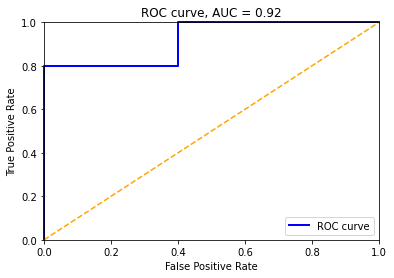

In [ ]:
# Vẽ biểu đồ đường cong ROC
import numpy as np
import matplotlib.pyplot as plt
TPR = []
FPR = []
for threshold in np.arange(0,1.05,0.05):
  TPR_new = sensitivity(y_hat, y, threshold)
  FPR_new = 1 - specificity(y_hat, y, threshold)
  TPR.append(TPR_new)
  FPR.append(FPR_new)

auc = -1 * np.trapz(TPR, FPR)

plt.plot(FPR, TPR, color='blue', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.show()

9. Vẽ biểu đồ biểu diễn giá trị của `precision, recall` trên đồ thị khi threshold thay đổi từ `[0, 1]` với steps là 0.05.

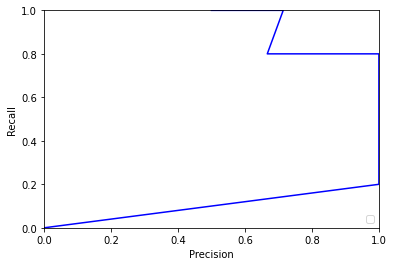

In [ ]:
# Vẽ biểu đồ precision va recall
import numpy as np
import matplotlib.pyplot as plt
prec = []
rec = []
for threshold in np.arange(0,1.05,0.05):
  prec_new = precision(y_hat, y, threshold)
  rec_new = recall(y_hat, y, threshold)
  prec.append(prec_new)
  rec.append(rec_new)

plt.plot(prec, rec, 'b')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.show()

10. Viết hàm tính diện tích AUC của mô hình.

In [ ]:
def AUC(y_hat, y, min_thresh, max_thresh, step_thresh):
  import numpy as np
  import matplotlib.pyplot as plt
  TPR = []
  FPR = []
  for threshold in np.arange(min_thresh,max_thresh+step_thresh,step_thresh):
    TPR_new = sensitivity(y_hat, y, threshold)
    FPR_new = 1 - specificity(y_hat, y, threshold)
    TPR.append(TPR_new)
    FPR.append(FPR_new)
    auc = -1 * np.trapz(TPR, FPR)
  return auc

In [ ]:
# Tinh AUC
AUC(y_hat, y, 0, 1, 0.05)

0.92